In [36]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_columns', 4)

In [4]:

os.chdir('C://Users//Sambid.Pradhan//Documents/')

## A

In [5]:
data=pd.read_csv("BA ZG512 Ecommerce-Customers.csv")

In [17]:
data[0:5]

,Email,Address,...,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",...,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",...,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",...,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",...,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",...,4.446308,599.406092


# B

<AxesSubplot:>

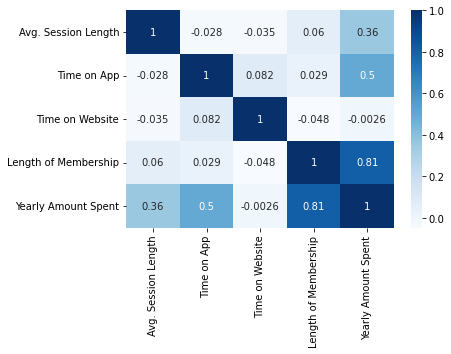

In [16]:
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

## There seems be a linear relationship between Length of Membership and Yearly Amount Spent.This is a strong positive linear relationship

## C

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [20]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [29]:
print("Avatar unique values----",len(data["Avatar"].unique()))
print("Email unique values----",len(data["Email"].unique()))
print("Address unique values----",len(data["Address"].unique()))

Avatar unique values---- 138
Email unique values---- 500
Address unique values---- 500


In [26]:
data["Avatar"].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

In [31]:
drop_cols=["Avatar","Email","Address"]
data=data.drop(drop_cols,axis=1)

In [34]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [37]:
x_feat=['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']

X=sm.add_constant(data[x_feat])
Y=data["Yearly Amount Spent"]

In [44]:
lin_model=sm.OLS(Y,X).fit()

In [45]:
lin_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                 OLS                    Adj. R-squared:        0.984    
Dependent Variable:    Yearly Amount Spent    AIC:                   3723.8197
Date:                  2022-10-08 09:43       BIC:                   3744.8927
No. Observations:      500                    Log-Likelihood:        -1856.9  
Df Model:              4                      F-statistic:           7766.    
Df Residuals:          495                    Prob (F-statistic):    0.00     
R-squared:             0.984                  Scale:                 99.466   
------------------------------------------------------------------------------
                       Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
------------------------------------------------------------------------------
const                -1051.5943  22.9925 -45.7363 0.0000 -1096.7693 -1006.4193
Avg. Session Length     25.7343   0.4510  57.0571 0.0000    24.8481    26.6204
Time on App             38.7092   0.4510  85.8282 0.0000    37.8230    39.5953
Time on Website          0.4367   0.4441   0.9834 0.3259    -0.4358     1.3093
Length of Membership    61.5773   0.4483 137.3463 0.0000    60.6964    62.4582
------------------------------------------------------------------------------
Omnibus:                  0.337             Durbin-Watson:               1.887
Prob(Omnibus):            0.845             Jarque-Bera (JB):            0.198
Skew:                     -0.026            Prob(JB):                    0.906
Kurtosis:                 3.083             Condition No.:               2642 
==============================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### i)Yes there seems to be significant relationship between predictors and the response variable. R2 is close to 1 that means our predictors explain a lot of variability in our model
### ii) Avg Session length, Time on App, Length of Membership appear to have a significant relationship with the response as their p value is less than 0.05.
### iii) Time on App coefficient indicates that for every single additional time spent on app you can expect the yearly Amount Spent increase by an average of 38.7 dollars.
### iv) Time on Website seems insignificant to our model. However we can use transformations , or combine with other features like Time on App, so basically we can calculate total here and use this as a feature. In this way we can use this information and make it more significant for the model

## D

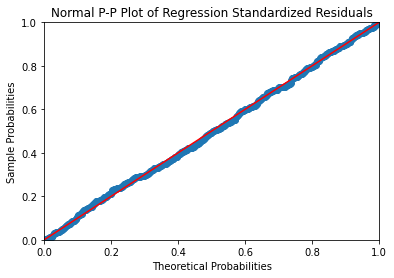

In [51]:
pplot=sm.ProbPlot(lin_model.resid,fit=True).ppplot(line='45')
plt.title("Normal P-P Plot of Regression Standardized Residuals")
plt.show()

In [52]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()
def plot_resid_fitted( fitted, resid, title): 
    plt.scatter( get_standardized_values( fitted ), 
                get_standardized_values( resid ) ) 
    plt.title( title ) 
    plt.xlabel( "Standardized predicted values") 
    plt.ylabel( "Standardized residual values") 
    plt.show() 

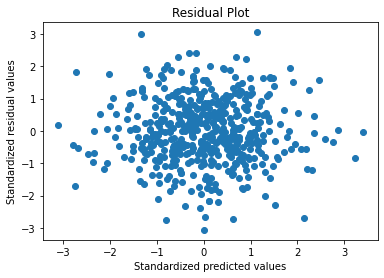

In [53]:
plot_resid_fitted(lin_model.fittedvalues,lin_model.resid,"Residual Plot")

### Yes the residulas are normally distributed as per PP Plot.